In [15]:
####1.order sheet length,shape,columns
####2.Calculate the average price of dishes
####3.What dish is most popular
####4.Which order id points the most, eats the most and spends the most money
####...

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#加中文 黑体
%matplotlib inline 
# draw the graph

#Import data from excel file
#1 Load data from excel file
data1 = pd.read_excel('C:/Users/n0123/Desktop/数据挖掘/mael_order_detail.xlsx',sheet_name ='meal_order_detail1')
data2 = pd.read_excel('C:/Users/n0123/Desktop/数据挖掘/mael_order_detail.xlsx',sheet_name ='meal_order_detail2')
data3 = pd.read_excel('C:/Users/n0123/Desktop/数据挖掘/mael_order_detail.xlsx',sheet_name ='meal_order_detail3')

#2. Unit three data, remove N/A
data = pd.concat([data1,data2,data3],axis = 0) #unit three data


data.dropna(axis =1,inplace = True)#delet N/A column, inplace change orignal data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [17]:
#average price of dishes

round(data['amounts'].mean(),2) #panadas way 

#Round the mean of the amounts column to two decimal places
round(np.mean(data['amounts']),2) #np way, faster!!!


44.82

dishes_name
白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: count, dtype: int64
0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


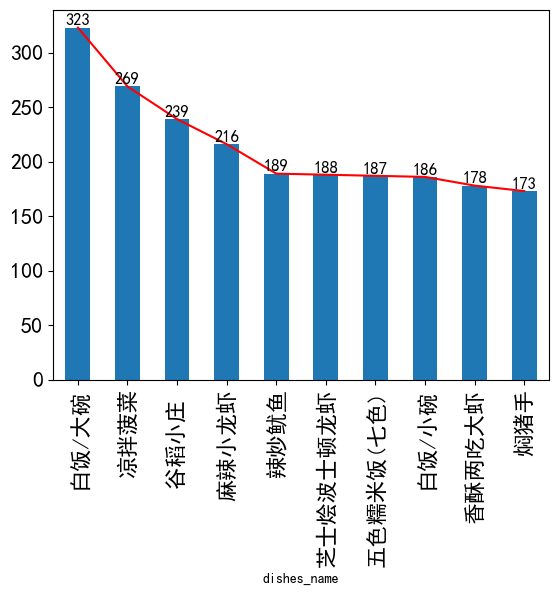

In [18]:
# Get the top 10 dishes

dishes_top10 = data['dishes_name'].value_counts().head(10)
# Print the top 10 dishes
print(dishes_top10)

# Create a line plot of the top 10 dishes
dishes_top10.plot(kind = 'line',color=['r'])
# Create a bar plot of the top 10 dishes
dishes_top10.plot(kind = 'bar',fontsize=16)


# Loop through the top 10 dishes
for x,y in enumerate (dishes_top10):
    # Print the dish number and the corresponding dish name
    print(x,y)    
    # Create a text element for the dish name
    plt.text(x,y+2,y ,ha = 'center',fontsize= 12) # type: ignore

# Display the plot
plt.show()

Text(0, 0.5, 'type_of_order')

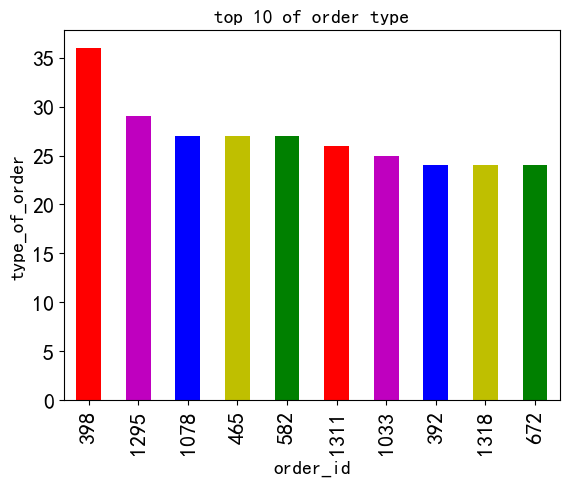

In [19]:
#Create a dataframe with the order_id and the number of times it appears

data_group  = data['order_id'].value_counts().head(10)
#Plot the dataframe with the order_id and the number of times it appears
data_group.plot(kind = 'bar',fontsize=16,color=['r','m','b','y','g'])
#Set the title of the plot
plt.title('top 10 of order type',fontsize=14)
#Set the x-axis label
plt.xlabel('order_id',fontsize=14)
#Set the y-axis label
plt.ylabel('type_of_order',fontsize=14)

Text(0.5, 1.0, 'the relationship of order_id and number_of_dishes')

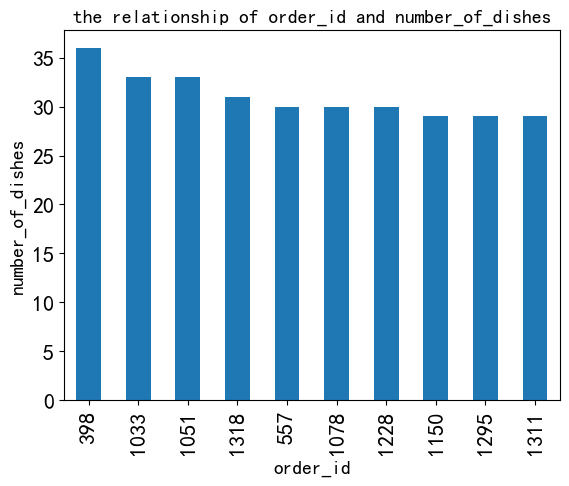

In [20]:
#Calculate the total amounts of each order_id

data['total_amounts'] = data['counts']*data['amounts']
#Group the data by order_id
dataGroup = data[['order_id','counts','amounts','total_amounts']].groupby('order_id')

#Calculate the total amounts of each order_id
Group_sum = dataGroup.sum()

#Sort the data by counts and show the top 10
sort_counts = Group_sum.sort_values(by = 'counts',ascending = False).head(10)#订单菜品数量最多的
sort_counts ['counts'].head(10).plot(kind = 'bar',fontsize=16)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('number_of_dishes',fontsize=14)
plt.title('the relationship of order_id and number_of_dishes',fontsize=14)

Text(0, 0.5, 'total_payment')

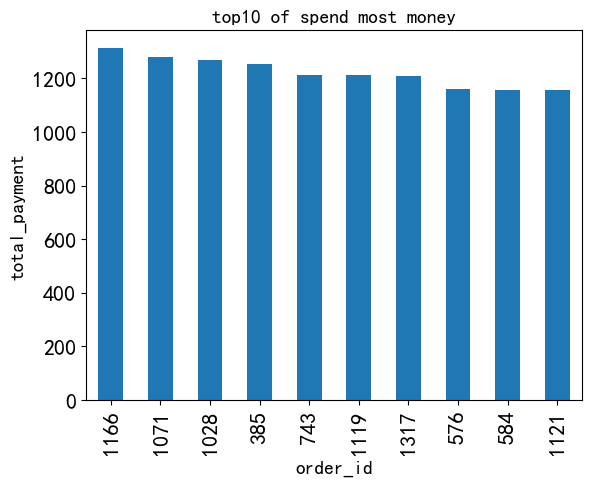

In [21]:
#order_id spend most money
sort_total_amounts=Group_sum.sort_values(by = 'total_amounts',ascending = False).head(10)
#print(sort_total_amounts)
sort_total_amounts['total_amounts'].plot(kind = 'bar',fontsize=16)

plt.title('top10 of spend most money',fontsize=14)
plt.xlabel('order_id',fontsize=14)
plt.ylabel('total_payment',fontsize=14)

          counts  amounts  total_amounts  Average
order_id                                         
168            9      423           1105   122.78
909            4      471            471   117.75
418            4      451            451   112.75
891            7      715            715   102.14
492            3      301            301   100.33
...          ...      ...            ...      ...
1174           8      110            121    15.12
632           10      126            140    14.00
1256           6       77             84    14.00
1303           9      112            124    13.78
874            6       70             76    12.67

[942 rows x 4 columns]


Text(0, 0.5, 'average_payment')

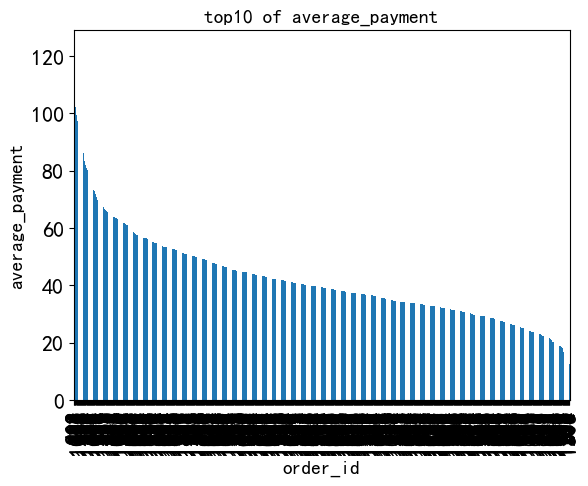

In [22]:
#Calculate the average amount of each group

Group_sum['Average'] = Group_sum['total_amounts']/Group_sum['counts']

#Sort the data by the average amount
sort_average = Group_sum.sort_values(by = 'Average',ascending = False) [:]#第100到第500
print(round(sort_average,2))
sort_average['Average'].plot(kind = 'bar',fontsize=16)

#Create a title for the graph
plt.title('top10 of average_payment',fontsize=14)
#Create an x-axis label
plt.xlabel('order_id',fontsize=14)
#Create a y-axis label
plt.ylabel('average_payment',fontsize=14)

In [23]:
#日期与时间维度进行点菜量的分析
#Date and time dimension for order volume analysis

Text(0.5, 1.0, 'the relationship bettween hour and count')

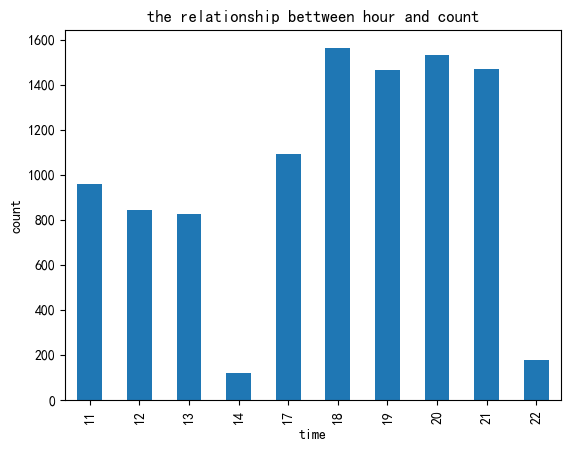

In [24]:
#which time has most order?

#Create a column called 'hour_count' and set it equal to 1
data['hour_count'] = 1 
#Create a column called 'time' and set it equal to the place_order_time column
data['time'] = pd.to_datetime(data['place_order_time'])

#Create a column called 'hour' and set it equal to the hour column of the 'time' column
data['hour'] =data['time'].map(lambda x:x.hour) 

#Create a groupby object called 'gp_by_hour' and apply the count() method to the 'hour_count' column
gp_by_hour = data.groupby('hour').count()['hour_count']
#Plot the groupby object 'gp_by_hour' using the 'bar' method
gp_by_hour.plot( kind = 'bar')


#Create a figure and a subplot
plt.xlabel ('time')
plt.ylabel ('count')
plt.title ('the relationship bettween hour and count')

Text(0.5, 1.0, 'each day order number')

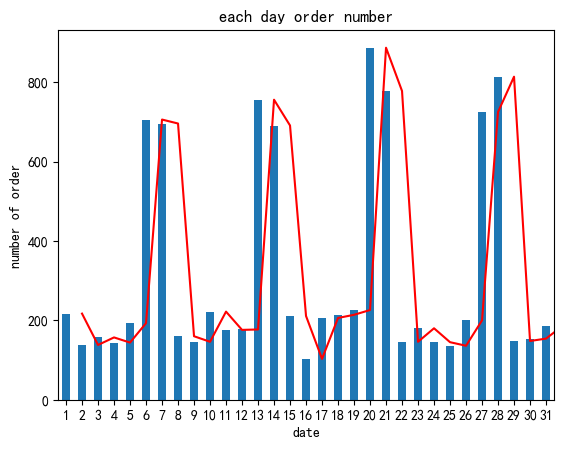

In [25]:
#which day has most orders

#Create a new column called 'day_count' and set it equal to 1
data['day_count'] = 1
#Create a new column called 'day' and set it equal to the day of the time column
data['day'] = data['time'].map(lambda x:x.day)

#Group the data by 'day' and count the number of 'day_count'
gp_by_day = data.groupby('day').count()['day_count']
#Plot the data grouped by 'day' and count the number of 'day_count'
gp_by_day.plot(kind = 'bar')
gp_by_day.plot(kind = 'line',color = 'r')
#Set the x-axis label to 'date'
plt.xlabel ('date')
#Set the y-axis label to 'number of order'
plt.ylabel ('number of order')
#Set the title to 'each day order number'
plt.title  ('each day order number')

Text(0.5, 1.0, 'each weekday order number')

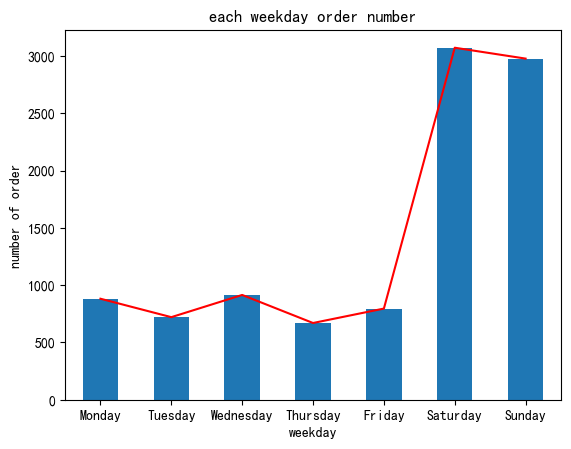

In [26]:
#which week has most order

data['weekday_count'] = 1
data['weekday'] = data['time'].map(lambda x:x.weekday())

#group by weekday and count the number of order
gp_by_weekday = data.groupby('weekday').count()['weekday_count']

#plot the number of order by weekday
gp_by_weekday.plot(kind = 'bar')
gp_by_weekday.plot(kind = 'line',color = 'r')

#define the x-axis labels
x_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#plot the x-axis labels
plt.xticks(range(7),x_labels)

#define the x-axis label
plt.xlabel ('weekday')
#define the y-axis label
plt.ylabel ('number of order')
#define the title of the graph
plt.title  ('each weekday order number')
